In [4]:
from calculation_engine.commands import RunSimulationCommand, SimulationPortfolioWeights, CashFlow
from calculation_engine.common.utils import *
import pandas as pd
import numpy as np


In [5]:
# RunSimulationCommand(number_of_simulations=1e5, end_step=60, weights=[SimulationPortfolioWeights(step=1, stocks=1.0)])

sim_dict = {
    "end_step": 40,
    "number_of_simulations": 100000,
    "weights": [
        {
            "step": 40,
            "stocks": 0.0
        },
        {
            "step": 20,
            "bonds": 1.0
        },
        {
            "step": 1,
            "stocks": 1
        }
    ],
    "savings_rates": [
        {
            "step": 1,
            "value": 100,
        },
        {
            "step": 2.2,
            "value": -1000,
        },

        {
            "step": 30,
            "value": -5000,
        },
    ],
    "simulation_type": "cholesky",
    "step_size": "annual",
    "initial_wealth": 100000,
    "savings_rate_interpolation": "linear",
}


sim_dict = {
  "number_of_simulations": 10000,
  "end_step": 60,
  "initial_wealth": 1000000,
  "inflation": 0.005,
  "asset_costs": {
    "Bonds": 0.005,
    "Stocks": 0.005,
    "Cash": 0.0028000000000000004
  },
  "savings_rates": [
    {
      "Step": 0,
      "Value": 0
    },
    {
      "Step": 60,
      "Value": 0
    }
  ],
  "weights": [
    {
      "Step": 0,
      "Bonds": 0.3,
      "Stocks": 0.5
    },
    {
      "Step": 30,
      "Bonds": 0.3,
      "Stocks": 0.5
    },
    {
      "Step": 60,
      "Bonds": 0.3,
      "Stocks": 0.5
    }
  ],
  "step_size": "annual",
  "simulation_type": "cholesky",
  "weights_interpolation": "linear",
  "savings_rates_interpolation": "linear",
  "percentiles": [
    5,
    25,
    50,
    75,
    95
  ]
}

cmd = RunSimulationCommand.model_validate(convert_json_to_snake(sim_dict))
result = cmd.handle()

   step  cashflow
0   0.0       0.0
1  60.0       0.0
Simulating...


d:\Projects\Decumulation Playground\Backend\calculation_engine\commands.py:87: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_sim_data["transactions"] = base_sim_data["transactions"].fillna(0)
d:\Projects\Decumulation Playground\Backend\calculation_engine\commands.py:130: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  exp_return['Expected Return'] = exp_return['overrides'].combine_first(exp_return['Expected Return'])


In [3]:
cmd.asset_costs

AssetCosts(cash=0.0028000000000000004, stocks=0.005, bonds=0.005)

In [ ]:
exp_return = cmd.simulation_strategy.expected_returns.join(pd.Series(cmd.asset_returns.model_dump(), name='overrides'))
exp_return = exp_return.join(pd.Series(cmd.asset_costs.model_dump(), name='costs'))
exp_return['Expected Return'] = exp_return['overrides'].combine_first(exp_return['Expected Return'])
exp_return['Expected Return'] = exp_return['Expected Return'] - exp_return['costs']
exp_return = exp_return.drop(columns=['overrides', 'costs'])
exp_return

C:\Users\CallumDavidson\AppData\Local\Temp\ipykernel_42376\4016606145.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  exp_return['Expected Return'] = exp_return['overrides'].combine_first(exp_return['Expected Return'])


,Expected Return
bonds,0.072893
stocks,0.105524
cash,0.061116


cash      None
stocks    None
bonds     None
dtype: object

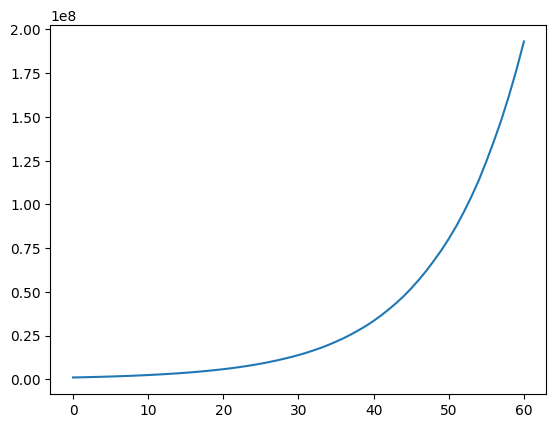

In [15]:
import matplotlib.pyplot as plt

# plt.plot(result.real.timesteps, result.real.mean)
# plt.plot(result.real.timesteps, result.nominal.mean)
plt.plot(result.timesteps, result.nominal.mean)

In [6]:
result.model_dump_json()

'{"real":{"timesteps":[0.0,1.0,2.0,2.2,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0],"percentiles":{"5.0":[100000.0,75085.065183047,69592.98034525468,69897.51921643043,68391.36452414971,66536.06733847794,65654.7617186711,65155.14855320137,65082.14985287075,65409.59827066716,65821.77289795925,66025.30292897666,66577.39221454671,67020.58652238981,67867.51296673116,68212.22349935645,68541.92390308826,68465.93875332453,68259.78558844232,67894.74587960399,67505.97106029495,66585.88266250512,65697.6377934761,64720.13511758691,63339.42112215483,61835.85149783818,59972.731067995526,57842.24918524119,55245.640861088155,52682.87988508802,49531.65742740912,46389.60847648811,42905.80453024912,39631.95803150269,35817.82019239956,32100.997583613997,28319.373675082028,24099.25621374919,20138.33400635638,15688.996169123759,10995.543093743467,6327.559081007957],"25.0

In [ ]:
from calculation_engine.simulation_strategies import CholeskySimulationStrategy

simulation = CholeskySimulationStrategy(cmd.base_simulation_data, 10000, 0.0, 100)


plt.plot(simulation.simulation_data.mean(axis=0).flatten(), label="Mean Wealth")
plt.plot(np.percentile(simulation.simulation_data, .1, axis=0))

In [ ]:
cmd.simulation_strategy.simulated_returns

In [ ]:
cmd.base_simulation_data

In [ ]:
cmd.simulation_strategy.expected_returns

In [ ]:
result = cmd.handle()

In [ ]:
import time
s = time.time()
convert_json_to_camel(result.model_dump_json())
e = time.time() - s
print(f"Time taken to convert: {e} seconds")

In [ ]:
result.model_dump().keys()

In [ ]:
s = time.time()
convert_json_to_camel(sim_dict)
e = time.time() - s
print(f"Time taken to convert: {e} seconds")

In [ ]:
result.destitution

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.timesteps, result.mean)


In [ ]:
SimulationPortfolioWeights(
    step=1,
    stocks=0.5,
    bonds=0.5,
    cash=0.0,
)

weight_dict = {
    "step": 1,
    "stocks": 0.5,
    "bonds": 0.5,
    "cash": 0.0,
}

weight = SimulationPortfolioWeights.model_validate(weight_dict)

In [ ]:
weight.model_dump_json()

In [ ]:
import numpy as np
import pandas as pd

end_step = 20*12
base_timesteps = np.arange(0, end_step + 1, 1)
base_timesteps = pd.Series(base_timesteps, name="timesteps")

base_sim_data = pd.DataFrame(index=base_timesteps)
weights = [
    SimulationPortfolioWeights(step = 1, stocks = 1.0),
    SimulationPortfolioWeights(step = 12, stocks = 0.5, bonds = 0.5),
    SimulationPortfolioWeights(step = 24, stocks = 0.0, bonds = 1.0),
    SimulationPortfolioWeights(step = 36, stocks = 1.0, bonds = 0.0, cash = 0.0),
    SimulationPortfolioWeights(step = 180, stocks = 0.0, bonds = 1.0),
]

weights = pd.DataFrame([weight.model_dump() for weight in weights])
weights = weights.set_index("step")

# weights = weights.merge(base_sim_data, how="outer", left_index=True, right_index=True)
# weights = weights.ffill()
# weights['stocks'] = weights['stocks'].fillna(0)
# weights['bonds'] = weights['bonds'].fillna(0)
# weights['cash'] = weights['cash'].fillna(1)

cashflows = [
    CashFlow(step=1, value=1000),
    CashFlow(step=2, value=1000),
    CashFlow(step=2.5, value=500),
    CashFlow(step=3.5, value=500),
    CashFlow(step=4, value=1000),
    CashFlow(step=5, value=1000),
]

cashflows = pd.DataFrame([cf.model_dump() for cf in cashflows])
cashflows = cashflows.rename(columns={"value": "cashflow"})
cashflows = cashflows.set_index("step")
base_sim_data = cashflows.merge(base_sim_data, how="outer", left_index=True, right_index=True)
base_sim_data = weights.merge(base_sim_data, how="outer", left_index=True, right_index=True)

base_sim_data['stocks'] = base_sim_data['stocks'].ffill()
base_sim_data['bonds'] = base_sim_data['bonds'].ffill()
base_sim_data['cash'] = base_sim_data['cash'].ffill()
base_sim_data['stocks'] = base_sim_data['stocks'].fillna(0)
base_sim_data['bonds'] = base_sim_data['bonds'].fillna(0)
base_sim_data['cash'] = base_sim_data['cash'].fillna(1)
base_sim_data['cashflow'] = base_sim_data['cashflow'].fillna(0)

base_sim_data['time_delta'] = base_sim_data.index.to_series().diff()

In [ ]:
from calculation_engine.data_utils import *

load_historical_returns_header().str.lower().to_list()

timesteps = base_sim_data.index.values

_sim_data = base_sim_data.dropna(how="any")

weights = _sim_data[load_historical_returns_header().str.lower().to_list()]

weights = weights.values

cashflows = _sim_data['cashflow'].values

time_delta = _sim_data["time_delta"]

In [ ]:
def cholesky_bootstrap_returns(n: int, s: int, cov: pd.DataFrame, exp_ret: pd.DataFrame) -> np.array:
    """
    Simulate returns using the Cholesky decomposition of the covariance matrix.
    Parameters
    ----------
    n : int
        Number of simulations.
    s : int
        Length of the simulation.
    cov : pandas.DataFrame
        Covariance matrix.
    exp_ret : pandas.DataFrame
        Expected returns.

    Returns
    -------
    np.array
        n x s x num_assets tensor

    """
    rng = np.random.default_rng()
    y = rng.multivariate_normal(exp_ret.values.flatten(), cov.values, size=(n, s))
    return y



sim_returns = cholesky_bootstrap_returns(10000, len(weights), get_historical_cov(), get_historical_exp_ret())


pd.DataFrame(sim_returns[1]).corr()

In [ ]:
def simulate_wealth(
    simulated_returns: np.array,
    weights: np.array,
    initial_wealth: float,
    cashflows: np.array,
    inflation: float = 0.03,
    time_steps: np.array = None,
) -> np.array:
    """
    Simulate wealth using the simulated returns and weights.
    Parameters
    ----------
    simulated_returns : np.array
        n x s x n_assets tensor of simulated returns.
    weights : np.array
        s x num_assets matrix of weights.
    initial_wealth : float
        Initial wealth.
    cashflows : np.array
        s x 1 vector of cashflows.
    time_steps : np.array, optional
        s+1 x 1 vector of time steps. If None, will be set to np.arange(0, s + 1).
    Returns
    -------
    np.array
        n x s+1 matrix of wealth.
    """

    n = simulated_returns.shape[0]  # number of simulations
    s = simulated_returns.shape[1]  # number of time steps
    k = simulated_returns.shape[2]  # number of assets
    
    wealth = np.zeros((n, s + 1))  # wealth array
    wealth[:, 0] = initial_wealth  # set initial wealth
    if time_steps is None:
        time_steps = np.arange(0, s + 1)  # time steps
    time_delta = np.diff(time_steps)  # time delta

    assert len(cashflows) == s, "Cashflows must be the same length as the number of time steps"
    assert len(time_steps) == s + 1, "Time steps must be the same length as the number of time steps + 1"
    assert weights.shape[0] == s, "Weights first dimension must be the same length as the number of time steps"
    assert weights.shape[1] == k, "Weights second dimension must be the same length as the number of assets"
    assert len(time_delta) == s, "Time delta must be the same length as the number of time steps - 1"
    assert np.all(time_delta > 0), "Time steps must be in ascending order"
    assert np.all(np.isfinite(simulated_returns)), "Simulated returns must be finite"
    assert np.all(np.isfinite(weights)), "Weights must be finite"
    assert np.all(np.isfinite(cashflows)), "Cashflows must be finite"
    assert np.all(np.isfinite(initial_wealth)), "Initial wealth must be finite"
    assert np.all(np.isfinite(time_steps)), "Time steps must be finite"

    inflation_factor = 1

    for i in range(s):
        inflation_factor *= (1 + inflation) ** time_delta[i]
        wealth[:, i + 1] = (
            wealth[:, i] * (weights[i] * (1 + simulated_returns[:, i, :]) ** time_delta[i]).sum(axis=1) + cashflows[i] * inflation_factor
        )
        wealth[wealth[:, i + 1] < 0, i + 1] = 0  # set negative wealth to 0

    return wealth


In [ ]:
sim_returns.shape

In [ ]:
sim_returns = cholesky_bootstrap_returns(10000, len(weights), get_historical_cov(), get_historical_exp_ret())

mean_w = simulate_wealth(
    simulated_returns=sim_returns,
    weights=weights,
    initial_wealth=1000000,
    cashflows=cashflows,
    time_steps=timesteps,
    inflation=0.03,
).mean(axis=0).flatten()


import matplotlib.pyplot as plt

plt.plot(timesteps, mean_w, label="Mean Wealth")



In [ ]:
plt.plot(np.percentile(simulation.simulation_data, 50, axis=0))

In [ ]:
get_historical_exp_ret().values.flatten()

In [ ]:
load_historical_returns().corr()

In [ ]:
exp_ret = get_historical_exp_ret().values
n = int(1e5)
s = len(weights)

num_assets = 3

exp_ret = np.tile(exp_ret, (n, 1, s))
z = np.random.normal(size=(n, s, num_assets))
L = np.linalg.cholesky(get_historical_cov())

exp_ret = exp_ret + np.rot90((z @ L), axes=(1,2))
exp_ret.shape

In [ ]:
np.rot90((z @ L), axes=(1,2))

In [ ]:
(z @ L)

In [ ]:
L

In [ ]:
get_historical_exp_ret()

In [ ]:
base_sim_data[load_historical_returns_header().str.lower().to_list()]

In [ ]:
CashFlow(
    step=1.0,
    value=1000.0,
)

In [ ]:
defined_points = [
    (1, 1000),
    (6, 1500),
    (10, 1000),
]

def interpolate_slave_points(
    defined_points: list,
    step: int) -> list[tuple[int, float]]:
    """
    Interpolate slave points between defined points.
    """

    slave_points = []
    for i, point in enumerate(defined_points[:-1]):
        x1, y1 = point
        x2, y2 = defined_points[i + 1]
        if x2 - x1 > step:
            for x in range(x1 + 1, x2, step):
                y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
                slave_points.append((x, y))
    return slave_points

In [ ]:
interpolate_slave_points(defined_points, 1)